In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
X = iris.data
y = iris.target

In [6]:
X.shape

(150, 4)

In [7]:
y.shape

(150,)

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

On their own, logistic regressions are only binary classifiers, meaning they cannot
handle target vectors with more than two classes. However, two clever extensions to
logistic regression do just that. First, in one-vs-rest logistic regression (OVR) a sepa‐
rate model is trained for each class predicted whether an observation is that class or
not (thus making it a binary classification problem). It assumes that each classifica‐
tion problem (e.g., class 0 or not) is independent.

In [9]:
def train_test_split(X, y, test_size):
    shuffled_indices = np.random.permutation(len(X))
    len_test_indices = int(test_size * len(X))
    len_train_indices = len(X) - len_test_indices
    test_indices = shuffled_indices[:len_test_indices]
    train_indices = shuffled_indices[len_test_indices:]
    train_X = X[train_indices]
    train_y = y[train_indices]
    test_X = X[test_indices]
    test_y = y[test_indices]
    return train_X, train_y, test_X, test_y

In [10]:
X_train, y_train, X_test, y_test = train_test_split(X, y, 0.2)

In [11]:
X_train.shape

(120, 4)

### Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modeling

#### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lgr = LogisticRegression(random_state=0, multi_class="ovr")
lgr.fit(X_train, y_train)
y_lgr = lgr.predict(X_test)

In [15]:
lgr.score(X_test, y_test)

0.9666666666666667

In [16]:
y_test[5], y_lgr[5]

(1, 1)

##### Confusion Matrix
From the confusion Matrix, we can derive efficient performace measures

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
def confusion_mat(y):
    return confusion_matrix(y_true = y_test, y_pred = y)

In [19]:
confusion_mat(y_lgr)

array([[11,  0,  0],
       [ 0,  6,  1],
       [ 0,  0, 12]], dtype=int64)

In [20]:
def conf_mat_heatmap(y):
    plt.figure(figsize = (15, 10))
    sns.heatmap(data = confusion_mat(y), annot = True, xticklabels = iris.target_names, yticklabels = iris.target_names)
    plt.title('Confusion Matrix')

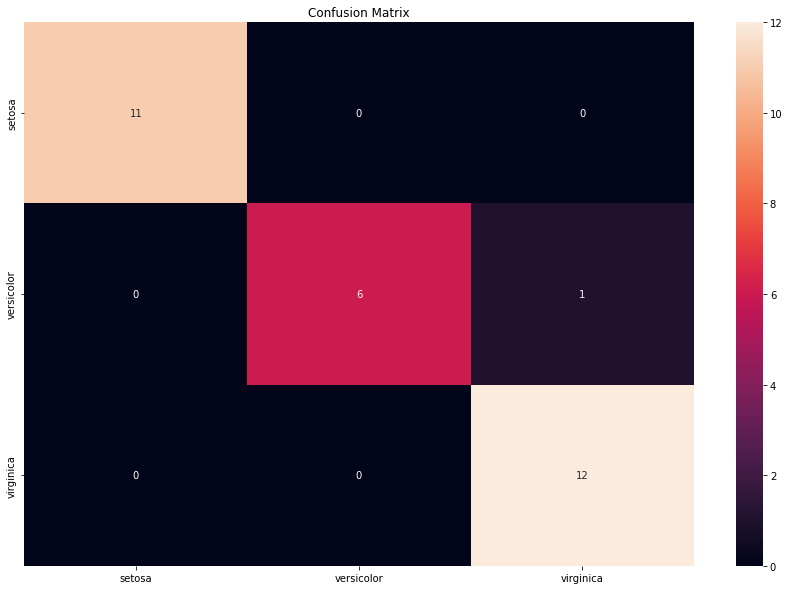

In [21]:
conf_mat_heatmap(y_lgr)

In [22]:
from sklearn.metrics import classification_report

In [23]:
def classification_rep(y):
    print(classification_report(y_test, y, target_names = iris.target_names))

In [24]:
classification_rep(y_lgr)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.86      0.92         7
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



### RandomForestClassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_rfc = rfc.predict(X_test)

In [27]:
confusion_mat(y_rfc)

array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  1, 11]], dtype=int64)

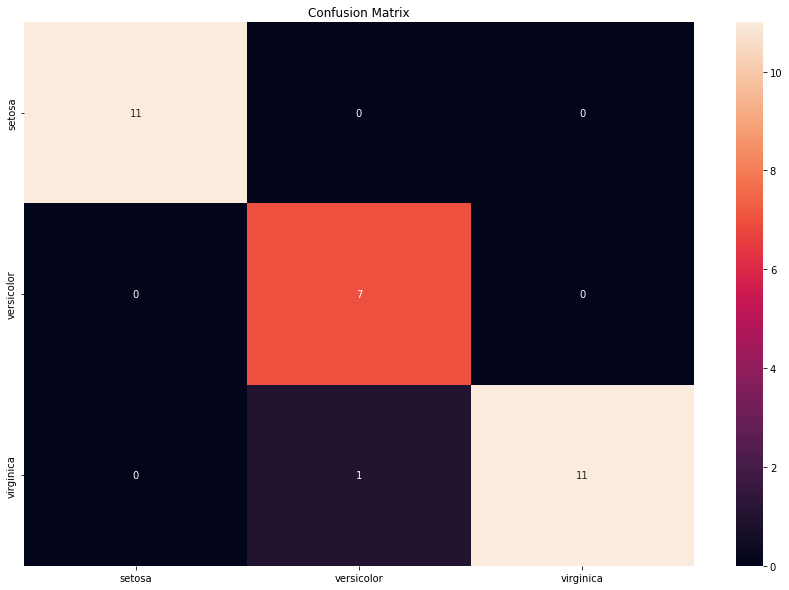

In [28]:
conf_mat_heatmap(y_rfc)

In [29]:
classification_rep(y_rfc)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.88      1.00      0.93         7
   virginica       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



The Random Forest Classifier did a better job

The methods of Cross Validation and Regularization can also be applied to reduce overfitting

In [30]:
from sklearn.linear_model import LogisticRegressionCV

In [31]:
lgrcv = LogisticRegressionCV(penalty='l2', Cs=10, random_state=0, n_jobs=-1)
lgrcv.fit(X_train, y_train)
y_lgrcv = lgrcv.predict(X_test)

In [32]:
confusion_mat(y_lgrcv)

array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 12]], dtype=int64)